In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv(r'/Users/megwed/Desktop/untitled folder 6/US_Accidents_Dec21_updated.csv')

In [22]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [23]:
df.shape

(2845342, 47)

## We want to know Top 10 cities with most number of car accidents

In [24]:
city_df = pd.DataFrame(df['City'].value_counts()).reset_index().rename(columns={'index':'City', 'City':'Cases'})

In [25]:
top_10_cities = pd.DataFrame(city_df.head(10))

Text(0.5, 1.0, '\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2021)\n')

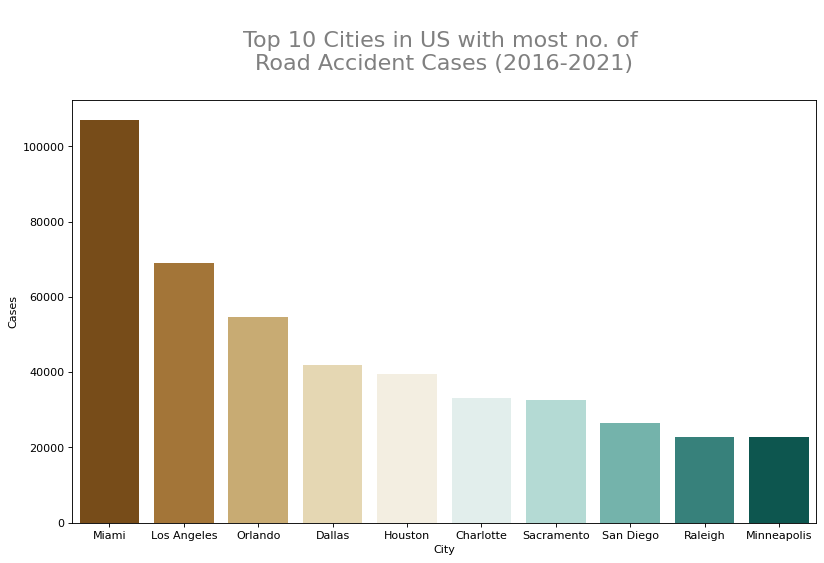

In [63]:
fig, ax = plt.subplots(figsize = (12,7), dpi = 80)
ax=sns.barplot(y=top_10_cities['Cases'], x=top_10_cities['City'], palette='BrBG')
plt.title('\nTop 10 Cities in US with most no. of \nRoad Accident Cases (2016-2021)\n', size=20, color='grey')

In [27]:
city_df.head(10)

,City,Cases
0,Miami,106966
1,Los Angeles,68956
2,Orlando,54691
3,Dallas,41979
4,Houston,39448
5,Charlotte,33152
6,Sacramento,32559
7,San Diego,26627
8,Raleigh,22840
9,Minneapolis,22768


# Insights :

   ## Top 3 cities are 

   ### Miami : 106966

   ### Los Angeles	: 68956

   ### Orlando : 54691

In [28]:
top_10_cases = city_df.head(10)['Cases'].sum()

In [17]:
top_10_cases

449986

In [19]:
(top_10_cases / len(df)) * 100

15.814829992317266

### if we sum the number of accidents of top 10 cities and divide by the total number of accidents we will discover that 15% of total numbers of accidents occures in only 10 cities 

In [33]:
state_df = pd.DataFrame(df['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Cases'})

In [34]:
top_ten_states_name = list(state_df['State'].head(10))

Text(0.5, 1.0, '\nTop 10 States with most no. of \nAccident cases in US (2016-2021)\n')

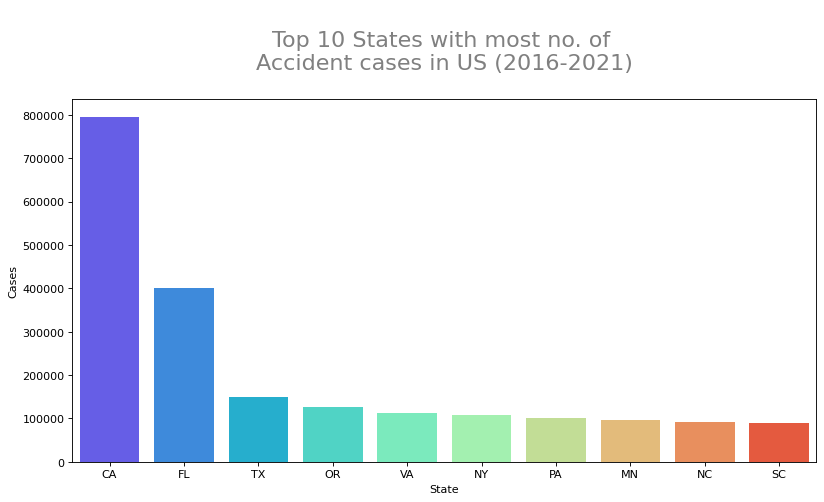

In [64]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=state_df['Cases'].head(10), x=state_df['State'].head(10), palette='rainbow')
plt.title('\nTop 10 States with most no. of \nAccident cases in US (2016-2021)\n', size=20, color='grey')

In [42]:
state_df.head()

,State,Cases
0,CA,795868
1,FL,401388
2,TX,149037
3,OR,126341
4,VA,113535


In [44]:
(795868 / len(df))*100

27.970908242313225

### we notice that most state in the number of car accidents is California with 795868 cases which is 27% of the Total number of accidents


In [46]:
timezone_df = pd.DataFrame(df['Timezone'].value_counts()).reset_index().rename(columns={'index':'Timezone', 'Timezone':'Cases'})

Text(0.5, 1.0, '\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2021)\n')

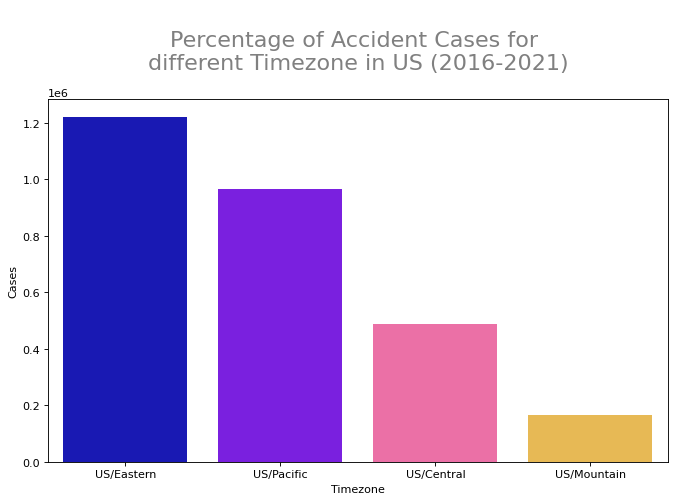

In [65]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)
ax=sns.barplot(y=timezone_df['Cases'], x=timezone_df['Timezone'], palette='gnuplot2')
plt.title('\nPercentage of Accident Cases for \ndifferent Timezone in US (2016-2021)\n', size=20, color='grey')

In [51]:
timezone_df.head()

,Timezone,Cases
0,US/Eastern,1221927
1,US/Pacific,967094
2,US/Central,488065
3,US/Mountain,164597


In [54]:
(1221927 / len(df)) * 100

42.94481999000472

In [55]:
(164597 / len(df)) * 100

5.784787909502619

###  Eastern time zone region of US has the highest no. of road accident cases (43%) in past 6 years.
###  Mountain time zone region of US has the lowest no. of road accident cases (5.7%) in past 6 years.

In [56]:
street_df = pd.DataFrame(df['Street'].value_counts()).reset_index().rename(columns={'index':'Street No.', 'Street':'Cases'})

Text(0.5, 1.0, '\nTop 10 Accident Prone Streets in US (2016-2021)\n')

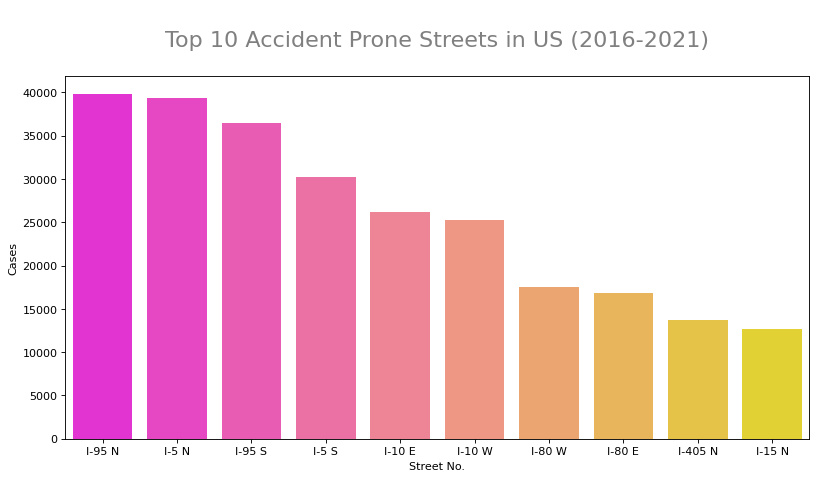

In [66]:
top_ten_streets_df = pd.DataFrame(street_df.head(10))
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=top_ten_streets_df['Cases'], x=top_ten_streets_df['Street No.'], palette='spring')
plt.title('\nTop 10 Accident Prone Streets in US (2016-2021)\n', size=20, color='grey')

### Street No. I-95 N is having the highest road accidents records

In [62]:
def street_cases_percentage(val, operator):
    if operator == '=':
        val = street_df[street_df['Cases']==val].shape[0]
    elif operator == '>':
        val = street_df[street_df['Cases']>val].shape[0]
    elif operator == '<':
        val = street_df[street_df['Cases']<val].shape[0]
    print('{:,d} Streets, {}%'.format(val, round(val*100/street_df.shape[0], 2)))
    
    
street_cases_percentage(1, '=')
street_cases_percentage(100, '<')
street_cases_percentage(1000, '<')
street_cases_percentage(1000, '>')
street_cases_percentage(5000, '>')

64,154 Streets, 40.18%
156,364 Streets, 97.94%
159,325 Streets, 99.8%
325 Streets, 0.2%
56 Streets, 0.04%


### 40.18% of the street in US have only 1 accident in the past 6 years
### 97.94% of the street in US have less than 100 accidents in the past 6 years
### 99.8.18% of the street in US have less than 1000 accidents in the past 6 years
### 0.2% of the street in US have more than 1000 accidents in the past 6 years
### 0.04% of the street in US have more than 500 accidents in the past 6 years

In [68]:
df['Severity'].unique()

array([3, 2, 4, 1])

Text(0.5, 1.0, 'Number of different accidents severity')

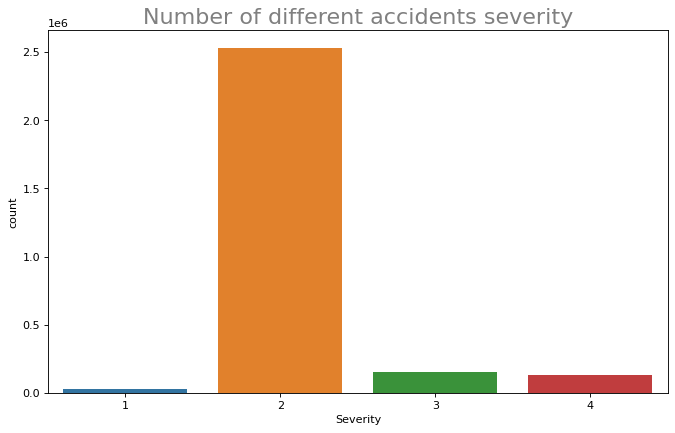

In [70]:
fig, ax = plt.subplots(figsize = (10,6), dpi = 80)
ax = sns.countplot(x='Severity', data=df)
plt.title('Number of different accidents severity', size=20, color='gray')

In [71]:
df['Severity'].value_counts()

2    2532991
3     155105
4     131193
1      26053
Name: Severity, dtype: int64

In [72]:
df['Severity'].value_counts(normalize=True)

2    0.890224
3    0.054512
4    0.046108
1    0.009156
Name: Severity, dtype: float64

### we notice that Severity with value 2 is more than all other values with 89%

In [73]:
df['Start_Time'].dtype

dtype('O')

In [76]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [77]:
df['Start_Time'].dtype

dtype('<M8[ns]')

In [78]:
df['End_Time'] = pd.to_datetime(df['End_Time'])

In [79]:
df['End_Time'].dtype

dtype('<M8[ns]')

In [80]:
accident_duration_df = pd.DataFrame(df['End_Time'] - df['Start_Time']).reset_index().rename(columns={'index':'Id', 0:'Duration'})

In [81]:
top_10_accident_duration_df = pd.DataFrame(accident_duration_df['Duration'].value_counts().head(10).sample(frac = 1)).reset_index().rename(columns={'index':'Duration', 'Duration':'Cases'})

Duration = [str(i).split('days')[-1].strip() for i in top_10_accident_duration_df.Duration]

top_10_accident_duration_df['Duration'] = Duration

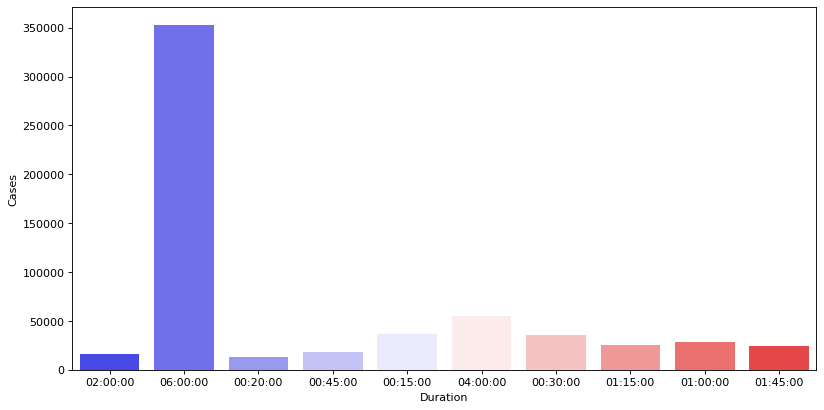

In [82]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=top_10_accident_duration_df['Cases'], x=top_10_accident_duration_df['Duration'], palette='bwr')

### So most accidents affect the trafic flow by 6 Hours

In [86]:
#df['Duration_Time'] = df['End_Time'] - df['Start_Time']

In [88]:
#df['year'] = df['Duration_Time'].apply(lambda x: pd.to_datetime(x).year)

In [90]:
#df['Duration_Time']

In [91]:
df['year'] = df['Start_Time'].apply(lambda x: pd.to_datetime(x).year)

Text(0.5, 1.0, 'numbers of accidents per years')

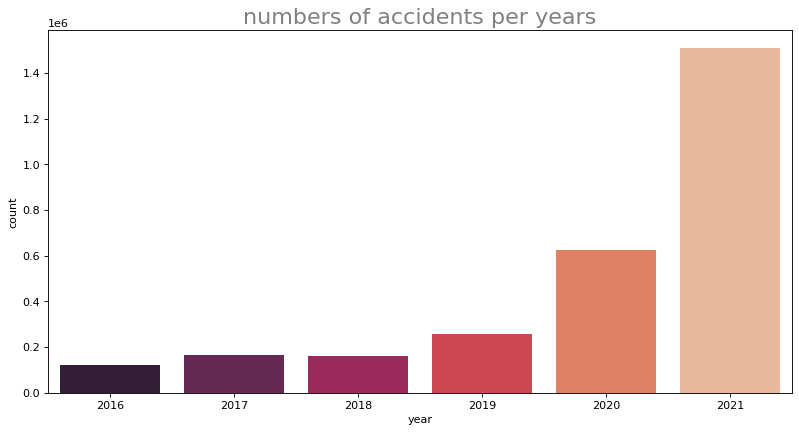

In [94]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
sns.countplot(x='year', data=df, palette='rocket')
plt.title('numbers of accidents per years', size=20, color='gray')

In [97]:
df['year'].value_counts(normalize=True)

2021    0.531305
2020    0.219961
2019    0.090891
2017    0.057609
2018    0.057348
2016    0.042886
Name: year, dtype: float64

### first insight : car accidents increase year by year in an exponintial way what is abnormal 
### second insight : year 2021 is more than other years with 53% of total accidents number
##  a side NOTE : Maybe the increase of accidents number come from the modern ways of collecting data 

In [99]:
accident_severity_df = df.groupby(['year', 'Severity']).size().unstack()    	

Text(0.5, 1.0, 'years by different levels of Severity')

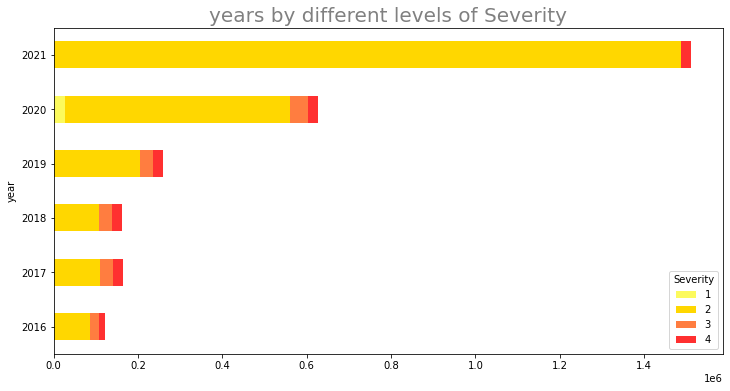

In [108]:
ax = accident_severity_df.plot(kind='barh', stacked=True, figsize=(12, 6), 
                               color=['#fcfa5d', '#FFD700', '#FF7D40', '#FF3030'],
                               rot=0)
plt.title('years by different levels of Severity', size=20, color='gray')                       

## 

In [109]:
accident_severity_df

Severity,1,2,3,4
year,,,,
2016,NaN,86758.0,21468.0,13798.0
2017,NaN,110365.0,30389.0,23164.0
2018,NaN,108568.0,30173.0,24435.0
2019,NaN,204759.0,30269.0,23587.0
2020,26053.0,534828.0,42806.0,22177.0
2021,NaN,1487713.0,NaN,24032.0


In [112]:
df['status'] = 1

In [118]:
grouped = df['status'].groupby(df['year']).sum()

In [120]:
accidents_per_day =  grouped / 365

Text(0.5, 1.0, 'Rate of accidents per days')

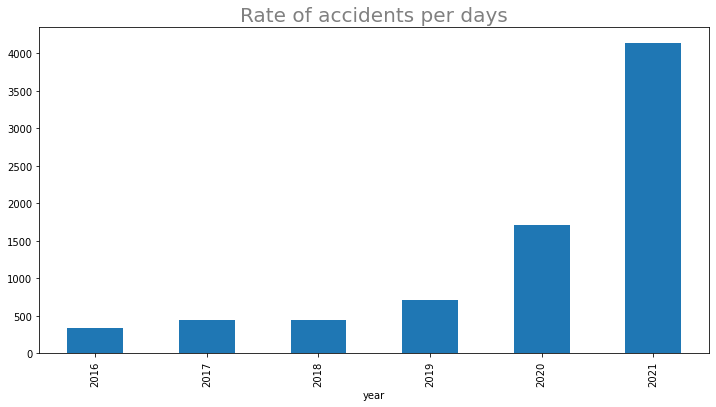

In [129]:
accidents_per_day.plot(kind='bar', figsize=(12,6) )
plt.title('Rate of accidents per days', size=20, color='gray')

## 2021 number of accidents per day is 8 times to 2017 

In [133]:
accidents_per_hour = grouped / (365*24)

Text(0.5, 1.0, 'Rate of accidents per hour')

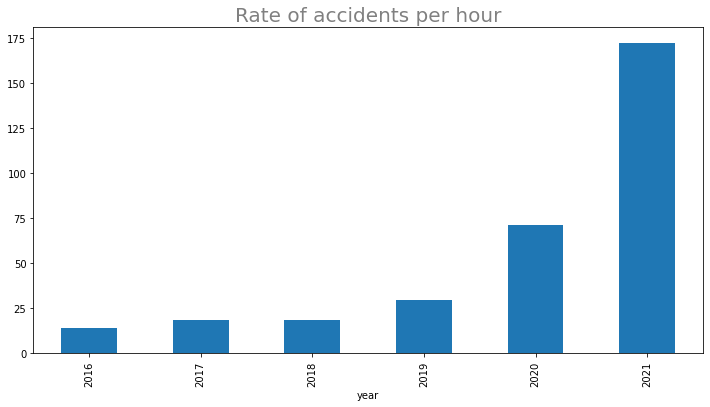

In [134]:
accidents_per_hour.plot(kind='bar', figsize=(12,6) )
plt.title('Rate of accidents per hour', size=20, color='gray')

## 2021 number of accidents per day is 7 times to 2017 

# Mounth Analysis

In [137]:
df['month'] = df['Start_Time'].apply(lambda x: pd.to_datetime(x).month)

Text(0.5, 1.0, 'numbers of accidents per months')

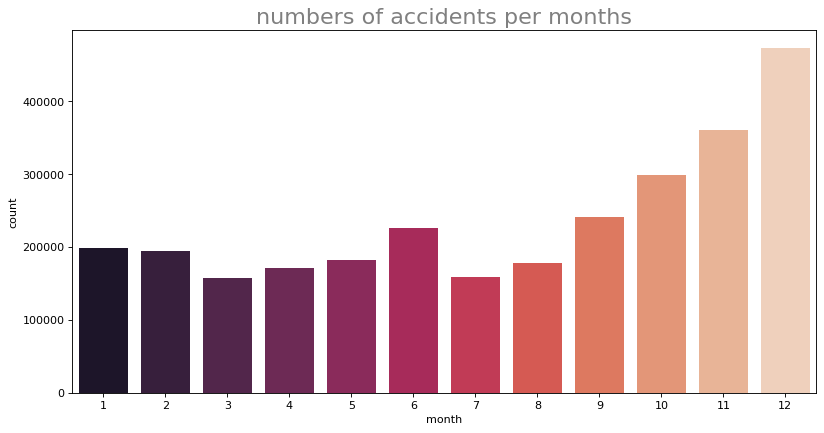

In [138]:
fig, ax = plt.subplots(figsize=(12, 6), dpi=80)
sns.countplot(x='month', data=df, palette='rocket')
plt.title('numbers of accidents per months', size=20, color='gray')

In [139]:
day_df = pd.DataFrame(df.Start_Time.dt.day_name().value_counts()).reset_index().rename(columns={'index':'Day', 'Start_Time':'Cases'})

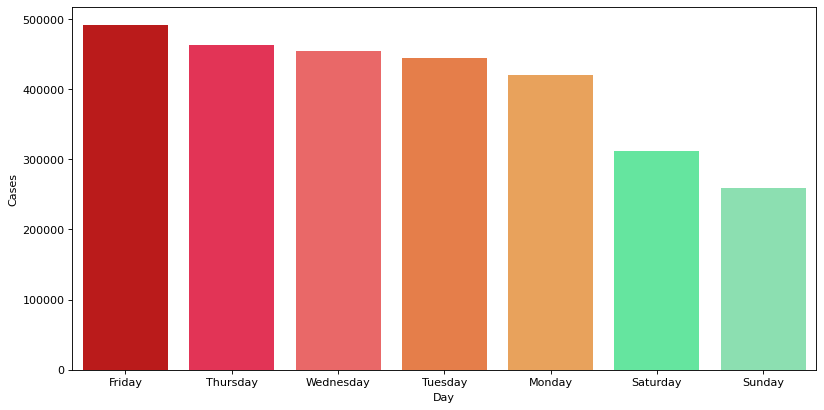

In [140]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=day_df['Cases'], x=day_df['Day'], palette=['#D50000', '#FF1744', '#FF5252', '#ff7530', '#ffa245', '#50fa9d', '#7eedb0'])


In [149]:
day_df['percent'] = (day_df['Cases']/2845342) * 100

In [151]:
day_df

,Day,Cases,percent
0,Friday,492074,17.294019
1,Thursday,463477,16.288973
2,Wednesday,455037,15.992348
3,Tuesday,443968,15.603326
4,Monday,419821,14.754676
5,Saturday,311691,10.954430
6,Sunday,259274,9.112226


## accidents occures in working day more than weekend (almost working days are 1.5 times weekend) 
## Only 20% of total accidents occures in  weekend because maybe poeple are staying home and they are likely to  be stress-free

In [163]:
hour_df = pd.DataFrame(df.Start_Time.dt.hour.value_counts()).reset_index().rename(columns={'index':'Hours', 'Start_Time':'Cases'}).sort_values('Hours')

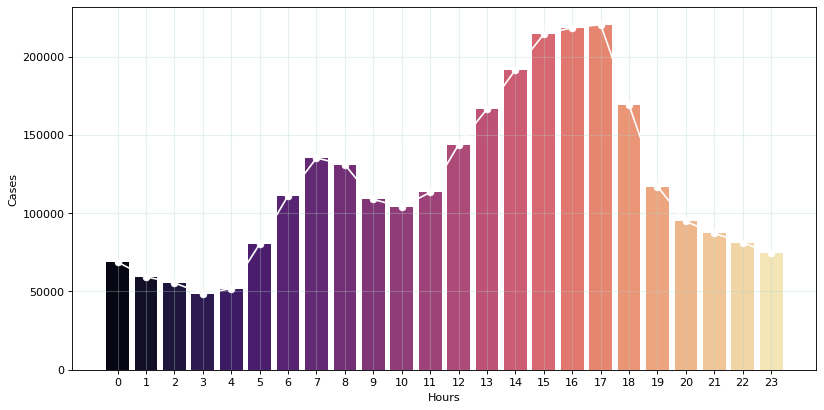

In [164]:
fig, ax = plt.subplots(figsize = (12,6), dpi = 80)
ax=sns.barplot(y=hour_df['Cases'], x=hour_df['Hours'], palette='magma')
sns.lineplot(data = hour_df, marker='o', x='Hours', y='Cases', color = 'white', alpha = 1)
ax.grid(color='#b2d6c7', linewidth=1, alpha=.3)

### This Shape called Bimodal/Multimodal Distribution
### Rush Hours of accidents are 3pm, 4pm and 5pm maybe they are the time of Evening Office-Returning Hours
### There is another Peak point on 7pm maybe it's the time of Morning Office-Going Hours
###  Around 17% of the road accidents occurred in between 6:00AM to 9:00AM
### In evening, around 29% of the road accidents occurred in between 3:00PM to 6:00PM.

In [170]:
hour_df['percent'] = (hour_df['Cases']/2845342) * 100

In [171]:
hour_df

,Hours,Cases,percent
19,0,68800,2.417987
20,1,59370,2.086568
21,2,55443,1.948553
23,3,48656,1.710023
22,4,51805,1.820695
17,5,80303,2.822262
11,6,111160,3.906736
7,7,135191,4.751309
8,8,130879,4.599763
12,9,108779,3.823055


In [172]:
3.906736 + 4.751309 + 4.599763 + 3.823055

17.080863

In [173]:
7.530343 + 7.675176 + 7.744517 + 5.938899

28.888935

# Road Condition Analysis

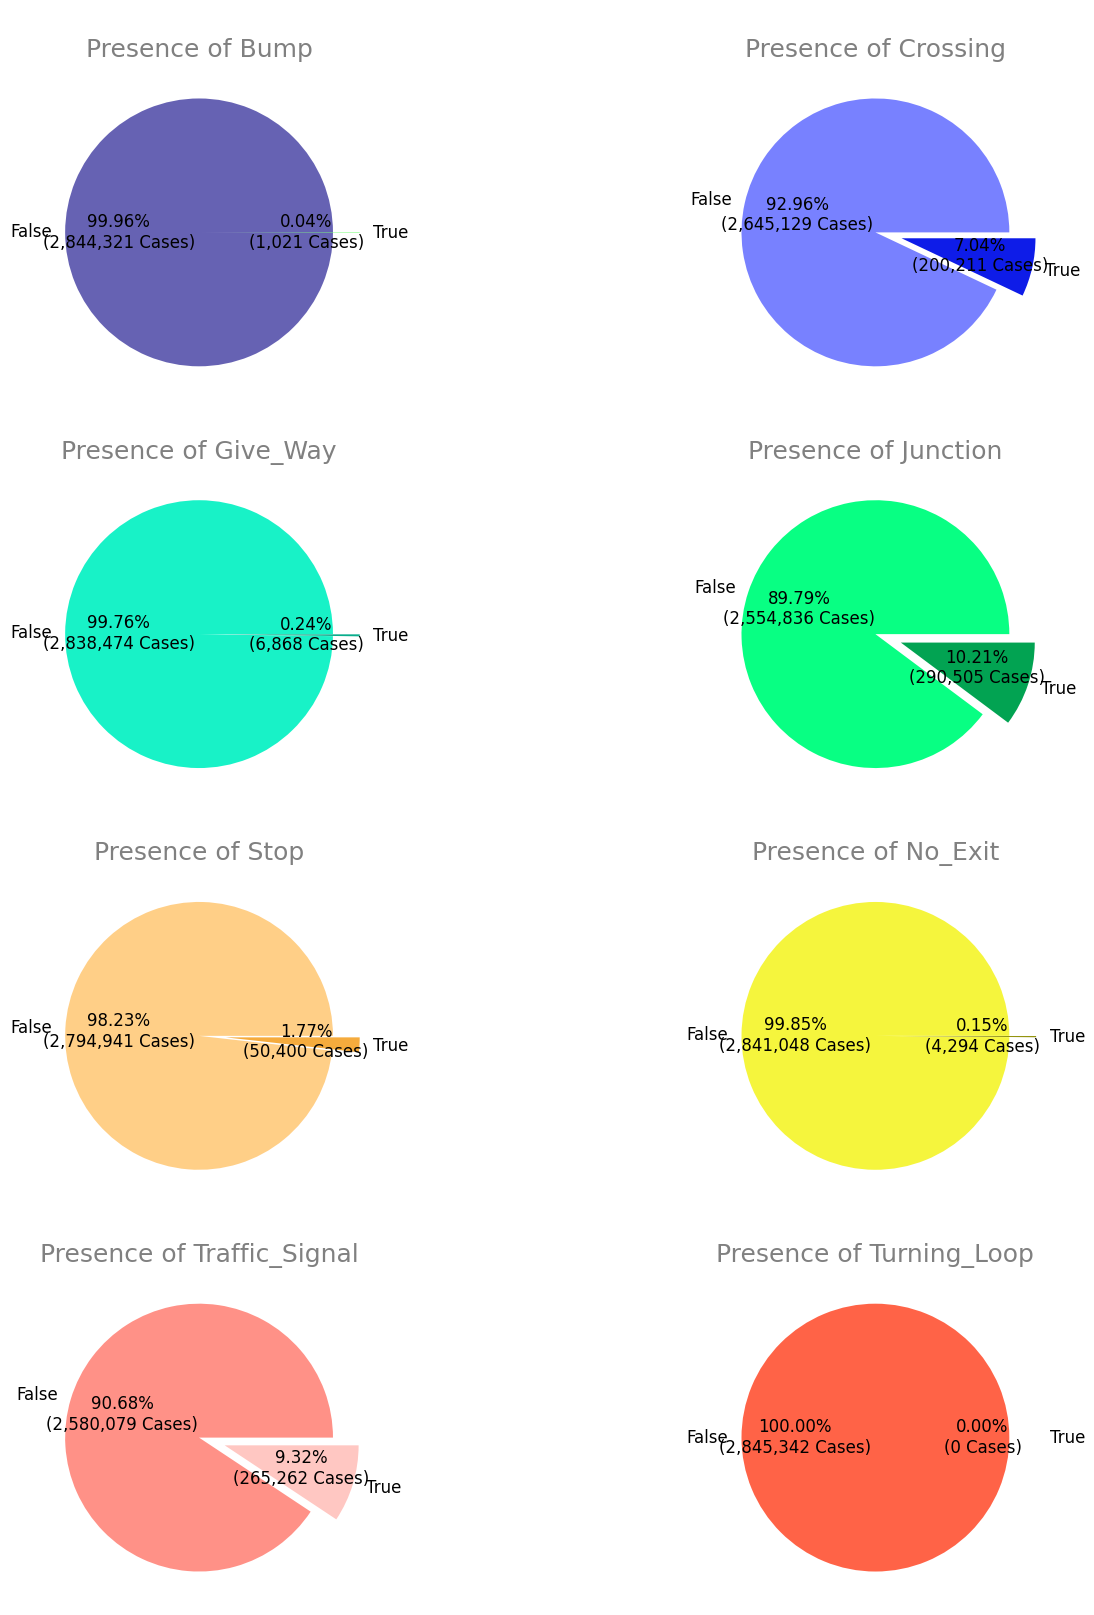

In [175]:
plt.style.use('default')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(nrows=4, ncols=2, figsize = (16,20))

road_conditions = ['Bump', 'Crossing', 'Give_Way', 'Junction', 'Stop', 'No_Exit', 'Traffic_Signal', 'Turning_Loop']
colors = [('#6662b3', '#00FF00'), ('#7881ff', '#0e1ce8'), ('#18f2c7', '#09ad8c'), ('#08ff83', '#02a352'), ('#ffcf87', '#f5ab3d'),
         ('#f5f53d', '#949410'), ('#ff9187', '#ffc7c2'), ('tomato', '#008000')]    
count = 0

def func(pct, allvals):
    absolute = int(round(pct/100*np.sum(allvals), 2))
    return "{:.2f}%\n({:,d} Cases)".format(pct, absolute)    

for i in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    
    size = list(df[road_conditions[count]].value_counts())
    if len(size) != 2:
        size.append(0)
    
    labels = ['False', 'True']
    
    i.pie(size, labels = labels, colors = colors[count],
                    autopct = lambda pct: func(pct, size), labeldistance=1.1,
                    textprops={'fontsize': 12}, explode=[0, 0.2])

    title = '\nPresence of {}'.format(road_conditions[count])

    i.set_title(title, fontsize = 18, color='grey')
    
    count += 1

# Weather condition Analysis

In [203]:
import scipy as sp
from scipy.stats import norm

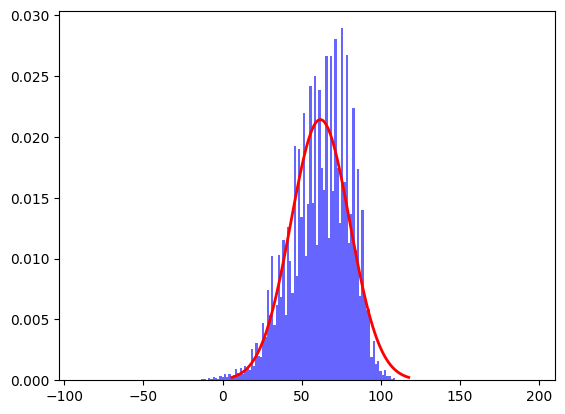

In [195]:
mean_T = np.mean(df['Temperature(F)'])
std_dev_T = np.std(df['Temperature(F)'])
plt.hist(df['Temperature(F)'], bins=200,  density=True, alpha=0.6, color='blue')
x = np.linspace(mean_T - 3*std_dev_T, mean_T + 3*std_dev_T, 100)
y = 1/(std_dev_T * np.sqrt(2 * np.pi)) * np.exp(- (x - mean_T)**2 / (2 * std_dev_T**2))
plt.plot(x, y, color='red', linewidth=2)

In [196]:
mean_T

61.793555921540836

In [197]:
std_dev_T

18.622626030270784

### In this normal distribution curve with a low spread has a narrow bell-shaped curve, indicating that the data points are tightly clustered around the mean value. This indicates that the variation or uncertainty in the data is relatively small, and the data is more consistent and precise.

In [204]:
lower_bound = mean_T - std_dev_T
upper_bound = mean_T + std_dev_T
prob_interval = norm.cdf(upper_bound, loc=mean_T, scale=std_dev_T) - norm.cdf(lower_bound, loc=mean_T, scale=std_dev_T)


In [205]:
prob_interval

0.6826894921370861

### This curve follow the Emprical rule as p(mean - std < x < mean + std) = 0.68

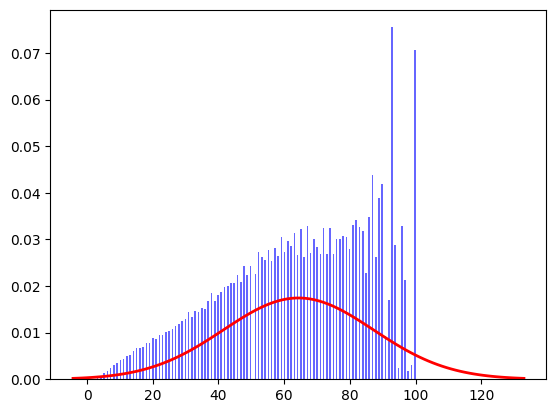

In [208]:
mean_H = np.mean(df['Humidity(%)'])
std_dev_H = np.std(df['Humidity(%)'])
plt.hist(df['Humidity(%)'], bins=200,  density=True, alpha=0.6, color='blue')
x = np.linspace(mean_H - 3*std_dev_H, mean_H + 3*std_dev_H, 100)
y = 1/(std_dev_H * np.sqrt(2 * np.pi)) * np.exp(- (x - mean_H)**2 / (2 * std_dev_H**2))
plt.plot(x, y, color='red', linewidth=2)

In [209]:
mean_H

64.36545224997745

In [210]:
std_dev_H

22.874563974979875

### In this normal distribution curve with a wide spread has a wider bell-shaped curve, indicating that the data points are more dispersed around the mean value. This indicates that there is more variation or uncertainty in the data, and the data is less consistent and precise.

In [211]:
lower_bound = mean_H - 2 * std_dev_H
upper_bound = mean_H + 2 * std_dev_H
prob_interval = norm.cdf(upper_bound, loc=mean_H, scale=std_dev_H) - norm.cdf(lower_bound, loc=mean_H, scale=std_dev_H)


In [212]:
prob_interval

0.9544997361036416

### This curve follow the Emprical rule as p(mean - 2 * std < x < mean + 2 * std) = 0.95

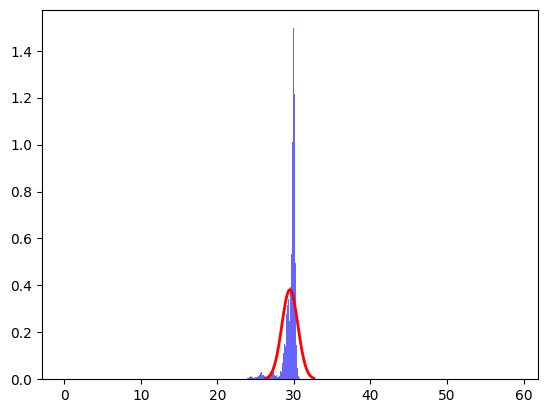

In [214]:
mean_P = np.mean(df['Pressure(in)'])
std_dev_P = np.std(df['Pressure(in)'])
plt.hist(df['Pressure(in)'], bins=2000,  density=True, alpha=0.6, color='blue')
x = np.linspace(mean_P - 3*std_dev_P, mean_P + 3*std_dev_P, 100)
y = 1/(std_dev_P * np.sqrt(2 * np.pi)) * np.exp(- (x - mean_P)**2 / (2 * std_dev_P**2))
plt.plot(x, y, color='red', linewidth=2)

### the spread in this curve is vere narrow

In [215]:
mean_P

29.472344381585728

In [216]:
std_dev_P

1.0452863092815314

In [217]:
lower_bound = mean_P - 2 * std_dev_P
upper_bound = mean_P + 2 * std_dev_P
prob_interval = norm.cdf(upper_bound, loc=mean_P, scale=std_dev_P) - norm.cdf(lower_bound, loc=mean_P, scale=std_dev_P)

In [218]:
prob_interval

0.9544997361036416

### the standard deviation in the Pressure curve is so small compared to other values and the mean and even the curve follows Emprical rule

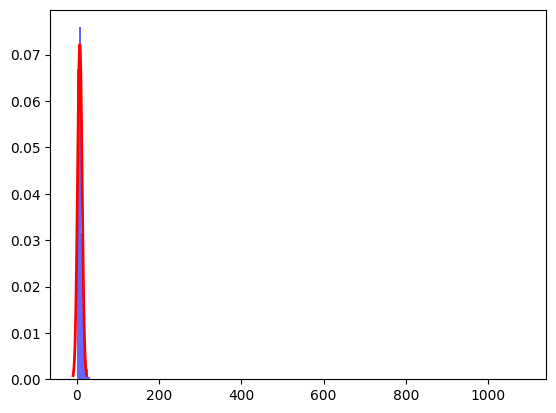

In [219]:
mean_W = np.mean(df['Wind_Speed(mph)'])
std_dev_W = np.std(df['Wind_Speed(mph)'])
plt.hist(df['Wind_Speed(mph)'], bins=200,  density=True, alpha=0.6, color='blue')
x = np.linspace(mean_W - 3*std_dev_W, mean_W + 3*std_dev_W, 100)
y = 1/(std_dev_W * np.sqrt(2 * np.pi)) * np.exp(- (x - mean_W)**2 / (2 * std_dev_W**2))
plt.plot(x, y, color='red', linewidth=2)

In [220]:
mean_W

7.3950442026078775

In [221]:
std_dev_W

5.527452922034056

In [222]:
lower_bound = mean_W - std_dev_W
upper_bound = mean_W + std_dev_W
prob_interval = norm.cdf(upper_bound, loc=mean_W, scale=std_dev_W) - norm.cdf(lower_bound, loc=mean_W, scale=std_dev_W)

In [223]:
prob_interval

0.6826894921370859

### Also the wind speed curve follow Emprical rule

# Goegraphy Condition Analysis

## accidents starting position

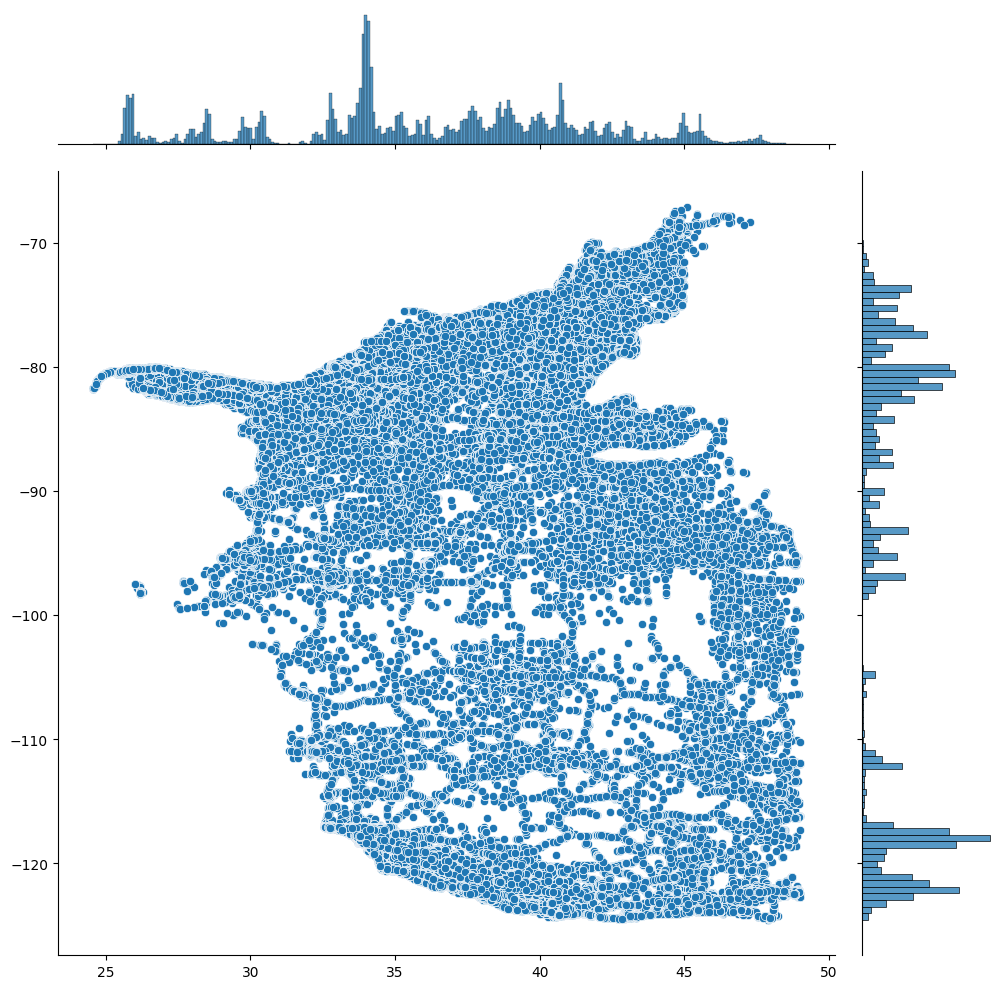

In [176]:
sns.jointplot(x=df.Start_Lat.values,y=df.Start_Lng.values,height=10)
plt.ylabel('Start_Lat', fontsize=12)
plt.xlabel('Start_Lng', fontsize=12)
plt.show()

## accidents ending position

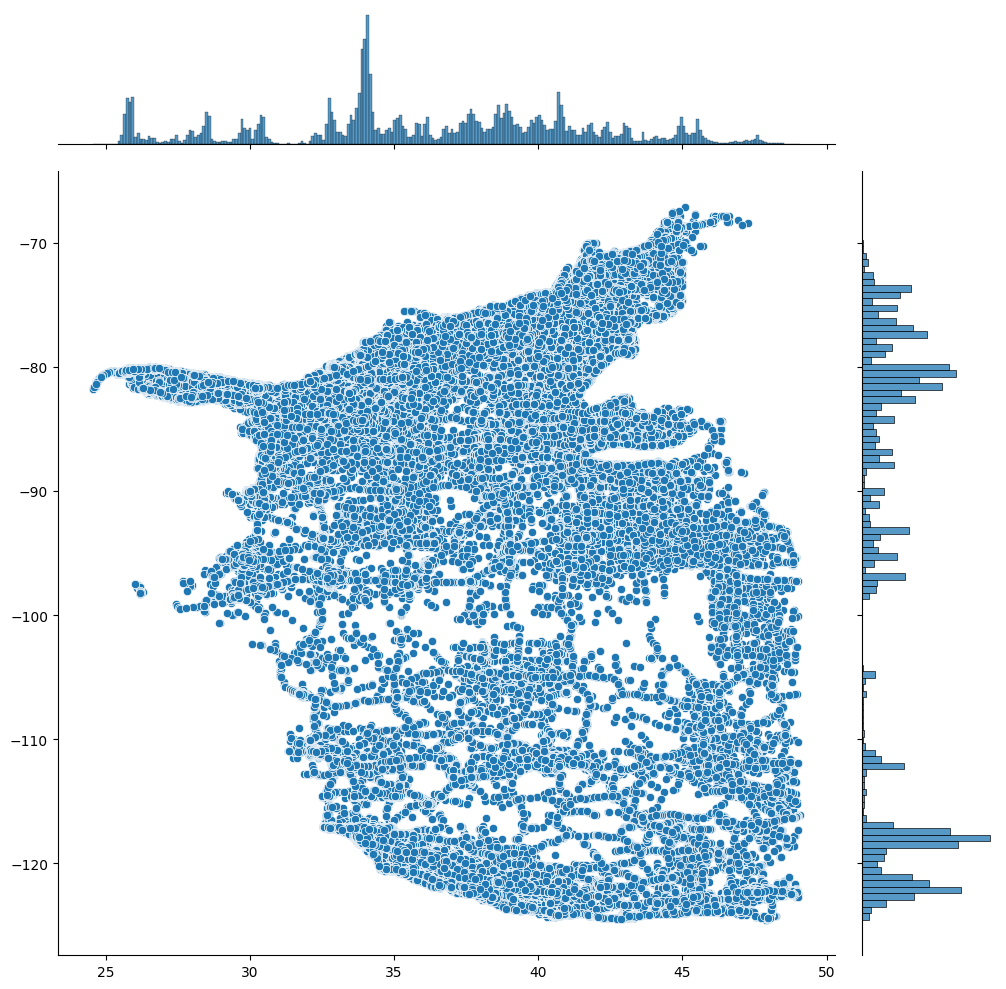

In [178]:
sns.jointplot(x=df.End_Lat.values,y=df.End_Lng.values,height=10)
plt.ylabel('End_Lat', fontsize=12)
plt.xlabel('End_Lng', fontsize=12)
plt.show()

### Not supose to find a bigg difference between both graphs